In [10]:
from PIL import Image
from skimage.measure import block_reduce
from skimage.io import imread_collection
import numpy as np
from matplotlib.pyplot import imshow,show
import scipy.sparse.linalg as ll
import math
from numpy import linalg as LA

In [11]:
def pre_process_img(col,pca_matrix):
    i=0
    for img in col:
        
        imgArray=np.array(img, dtype='int32')

        reducedImg =block_reduce(imgArray, block_size=(4,4), func=np.mean)

#         display(reducedImg)
#         imshow(reducedImg,cmap="gray")
#         show()
        vectorizedImg=reducedImg.reshape(-1)

#         print(vectorizedImg.shape)
#         display(vectorizedImg)

        pca_matrix[:, i] = vectorizedImg
        i+=1

In [12]:
# Reference: Demo code provided by prof X, along with the hw.
def apply_pca(pca_matrix,K=6):
    m,n= pca_matrix.shape
    mu = np.mean(pca_matrix,axis = 1)
    xc = pca_matrix - mu[:,None]

    C = np.dot(xc,xc.T)/m
    print("---C1----")
    print(C)

    
    S,W = ll.eigs(C,k = K)
    S = S.real
    W = W.real
    print ("\n======== Top 6 Eigen Vectors ==========\n")
    print (W)
    print ("\n======== Top 6 Eigenvalues ==========\n")
    print (S)
    return S,W


In [13]:
def print_eigen_faces(W):
    for col in W.T:
        W_reshaped=col.reshape(61,80)
        imshow(W_reshaped,cmap="gray")
        show()

coll 2 length:  9


array([[223.75  , 223.75  , 223.75  , ..., 223.75  , 223.75  , 223.75  ],
       [223.75  , 223.75  , 223.75  , ..., 223.75  , 223.75  , 223.75  ],
       [223.75  , 223.75  , 223.6875, ..., 223.75  , 223.75  , 223.75  ],
       ...,
       [144.5   , 144.5   , 110.625 , ..., 144.5   , 144.5   , 144.0625],
       [143.6875, 143.5625, 110.75  , ..., 143.5625, 143.9375, 142.4375],
       [144.3125, 144.    , 117.    , ..., 144.25  , 144.375 , 143.3125]])

array([[223.75  , 223.75  , 223.75  , ..., 223.75  , 223.75  , 223.75  ],
       [223.375 , 223.1875, 223.75  , ..., 223.1875, 223.625 , 223.25  ],
       [221.0625, 223.75  , 223.75  , ..., 221.125 , 221.5625, 221.125 ],
       ...,
       [144.5   , 144.5   , 140.625 , ..., 144.5   , 143.75  , 144.5   ],
       [144.5   , 144.5   , 136.375 , ..., 144.5   , 144.375 , 144.5   ],
       [144.5   , 144.5   , 136.25  , ..., 144.5   , 144.375 , 144.5   ]])

---C1----
[[4.07729004 4.11156738 4.1662207  ... 0.60842285 0.74134277 1.05250488]
 [4.11156738 4.14613289 4.20124568 ... 0.6135378  0.74757516 1.06135318]
 [4.1662207  4.20124568 4.25709176 ... 0.62207832 0.75788662 1.07577116]
 ...
 [0.60842285 0.6135378  0.62207832 ... 0.29916952 0.31325283 0.32481549]
 [0.74134277 0.74757516 0.75788662 ... 0.31325283 0.33202973 0.3546474 ]
 [1.05250488 1.06135318 1.07577116 ... 0.32481549 0.3546474  0.40687284]]

======== Top 6 Eigen Vectors ==========

[[-1.69689287e-02  4.73295464e-03 -3.25438700e-03  1.75100934e-03
  -5.82962315e-05  1.77323116e-03]
 [-1.71115847e-02  4.77274408e-03 -3.28174629e-03  1.76572989e-03
  -5.87863218e-05  1.78813853e-03]
 [-1.73406680e-02  4.82723478e-03 -3.32289393e-03  1.78871927e-03
  -5.88455933e-05  1.81174714e-03]
 ...
 [-3.41188170e-03 -4.13925320e-03  8.48790500e-04  1.31547643e-05
   2.02132285e-04  2.81944717e-04]
 [-3.94095648e-03 -3.85219497e-03  7.03091737e-04 -1.52261571e-05
  -3.28367494e-04  4.40846382

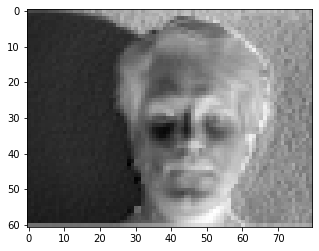

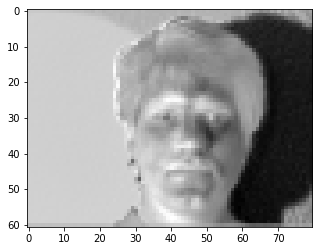

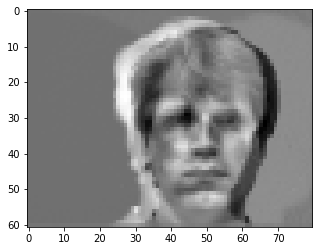

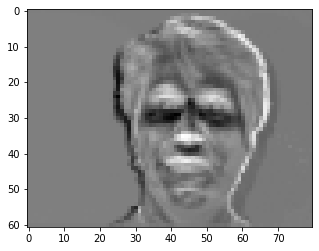

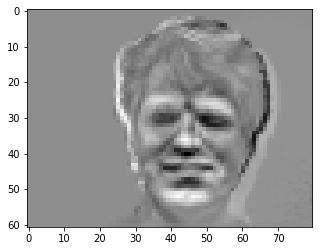

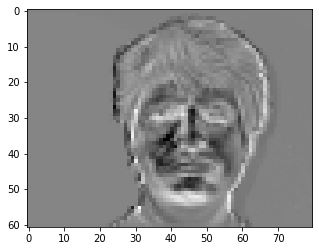

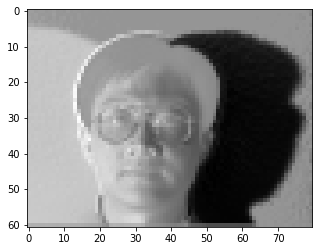

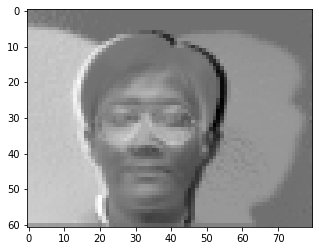

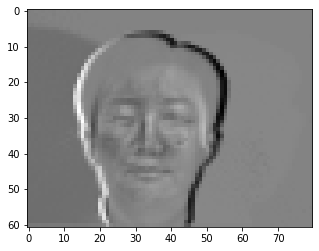

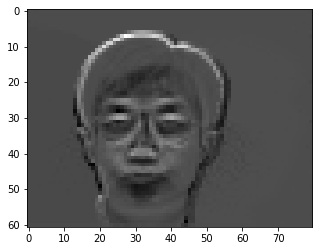

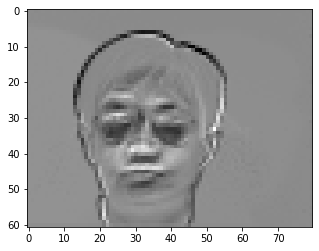

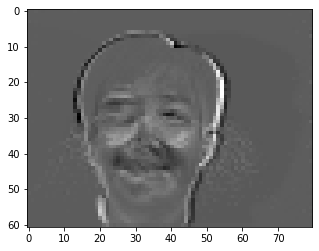

In [14]:
pca_matrix_1 = np.zeros(shape=(4880,10))
pca_matrix_2 = np.zeros(shape=(4880,9))

collection_1 = imread_collection("data/yalefaces/subject01.*.gif")
collection_2 = imread_collection("data/yalefaces/subject02.*.gif")
print("coll 2 length: ",len(collection_2))


pre_process_img(collection_1,pca_matrix_1)
pre_process_img(collection_2,pca_matrix_2)


display(pca_matrix_1)
display(pca_matrix_2)

S1,W1 =apply_pca(pca_matrix_1)
S2,W2 =apply_pca(pca_matrix_2)



print_eigen_faces(W1)
print_eigen_faces(W2)

2


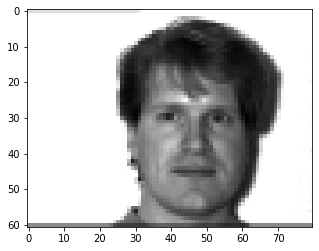

s 1 1: -0.8774034891566553
s 1 2: -0.093376100443711


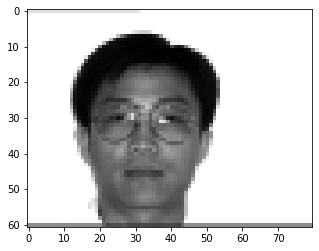

s 2 1: -0.7000553801635848
s 2 2: -0.41782208225037215
[[-0.87740349 -0.70005538]
 [-0.0933761  -0.41782208]]


In [15]:
topImage1=W1[:,0]
topImage1Norm=LA.norm(topImage1)

topImage2=W2[:,0]
topImage2Norm=LA.norm(topImage2)


col2 = imread_collection("data/yalefaces/*test*.gif")
result = np.zeros(shape=(2,2))
i=0
print(len(col2))
for img in col2:
    imgArray=np.array(img, dtype='int32')
    reducedImg =block_reduce(imgArray, block_size=(4,4), func=np.mean)
    
    imshow(reducedImg,cmap="gray")
    show()
    vectorizedImg=reducedImg.reshape(-1)
   
    testImageNorm = LA.norm(vectorizedImg)
    numerator=np.inner(topImage1.T,vectorizedImg)
    denom=topImage1Norm*testImageNorm
    sij1=numerator/denom
    print("s",i+1,"1:",sij1)
    result[0,i]=sij1
    
    numerator=np.inner(topImage2.T,vectorizedImg)
    denom=topImage2Norm*testImageNorm
    sij2=numerator/denom
    print("s",i+1,"2:",sij2)
    result[1,i]=sij2
    
    i+=1
    
    
print(result)
